Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
titanic_file = pd.read_csv('train.csv')
titanic_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(titanic_file.info())
titanic_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

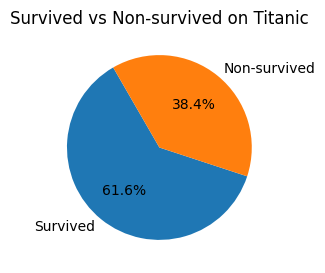

In [5]:
survived_amount = titanic_file['Survived'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(survived_amount, labels=['Survived', 'Non-survived'],
        autopct='%1.1f%%', startangle=120)
plt.title('Survived vs Non-survived on Titanic')
plt.show()

В цьому завданні було створено pie chart(кругову діаграму), який показує співвідношення виживших до загиблих на Титаніку. Як можна помітити, кількість виживших людей переважає над кількістю загиблих на 23,2%



3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


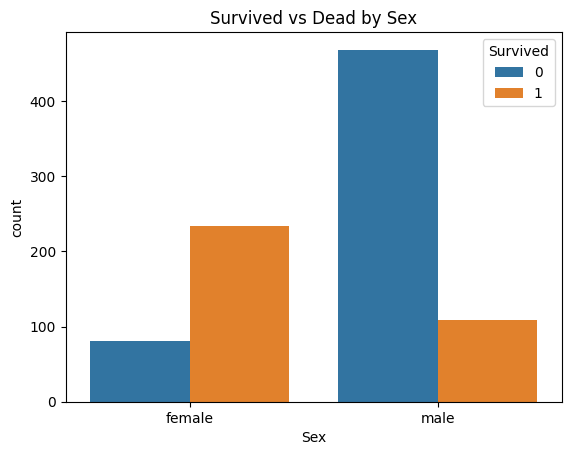

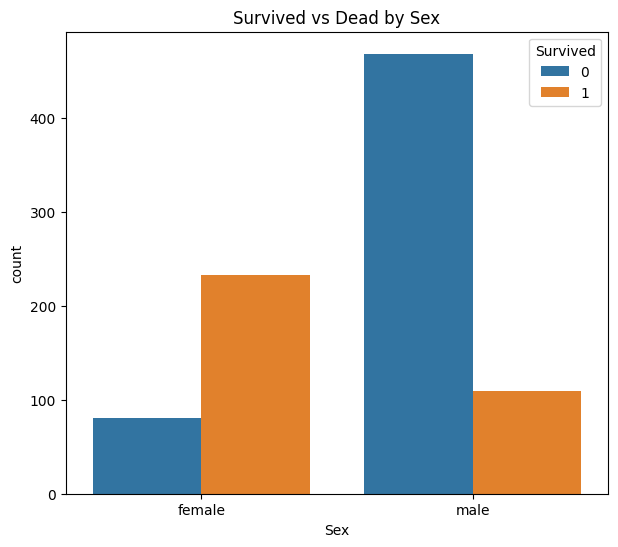

In [6]:
survived_amount_sex = (titanic_file.groupby(['Sex', 'Survived'], as_index=False)
                        ['PassengerId'].count())
survived_amount_sex.rename(columns={'PassengerId': 'count'}, inplace=True)
plt.figure(figsize=(7, 6))
sns.barplot(x="Sex", y="count", hue="Survived", data=survived_amount_sex,
            errorbar=None)
plt.title('Survived vs Dead by Sex')
plt.legend(title='Survived', labels=['0', '1'])
plt.show()

В цьому завданні було створено bar chart, який показує піввідношення загиблих до виживших для кожної статі. За графіком видно, що кількість загиблих серед чоловіків явно переважає над кількістю загиблих серед жінок (більше 400 осіб). В той час як виживших жінок більше, ніж чоловіків (230-250 осіб)

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

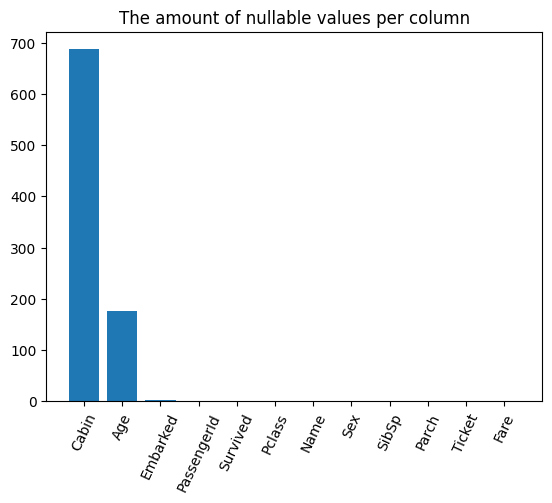

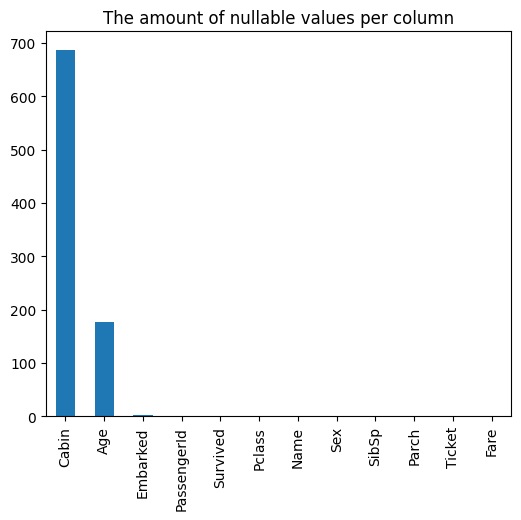

In [7]:
null_val_per_column = titanic_file.isnull().sum()
column_order = (['Cabin', 'Age', 'Embarked'] +
                [col for col in null_val_per_column.index
                 if col not in ['Cabin', 'Age', 'Embarked']])
null_val_per_column_order = null_val_per_column.loc[column_order]
plt.figure(figsize=(6, 5))
null_val_per_column_order.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.show()

В цьому завданні було створено bar chart, що відображає кількість пропущених значень в датасеті по кожній із змінних. За графіком видно, що кількість пропущених значень в змінній "Cabin" доходить майже до 700 значень, в "Age" - до 200, а в "Embarked" - в межах від 0 до 5 максимум.
Отже, для нас невідомо:
*   в яких саме каютах перебувало ~700 пасажирів;
*   вік ~200 пасажирів, що перебували на Титаніку;
*   в яких портах виконало посадку ~5 пасажирів





5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

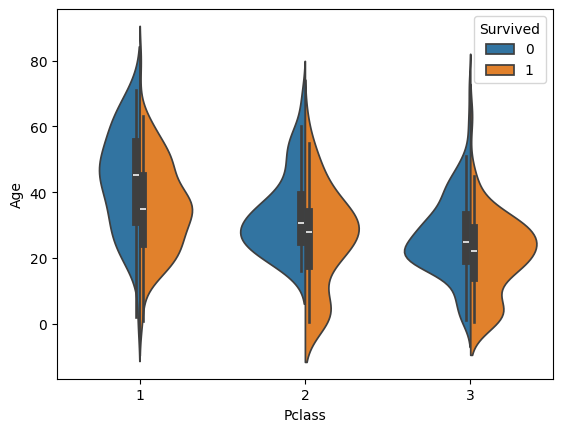

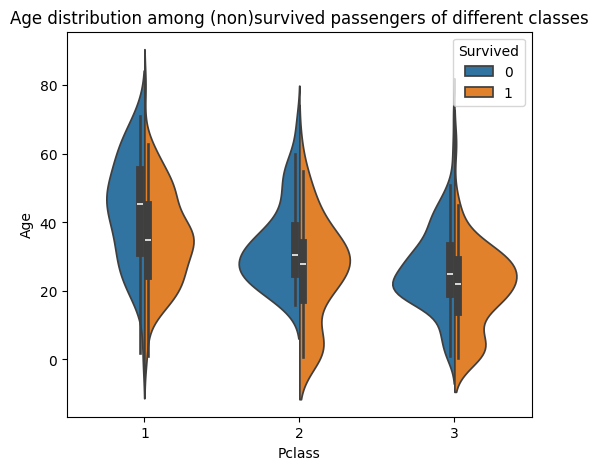

In [8]:
plt.figure(figsize=(6, 5))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_file,
               split=True)
plt.title('Age distribution among (non)survived passengers of different classes')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

Було створено діаграму, що показує розподіл віку виживших/загиблих пасажирів за класами квитків(кают?).
На діаграмі видно, що кількість загиблих переважає серед молодих людей (20-40 років), що перебували в каютах другого та третього класів. Також можна помітити, що всі сім'ї подорожували в каютах цих класів, оскільки значна кількість дітей відслідковується саме в них. В той час як в каютах першого класу переважали люди 30+ років

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


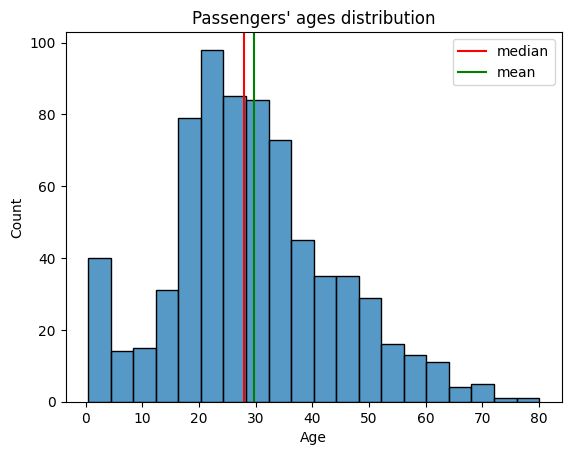

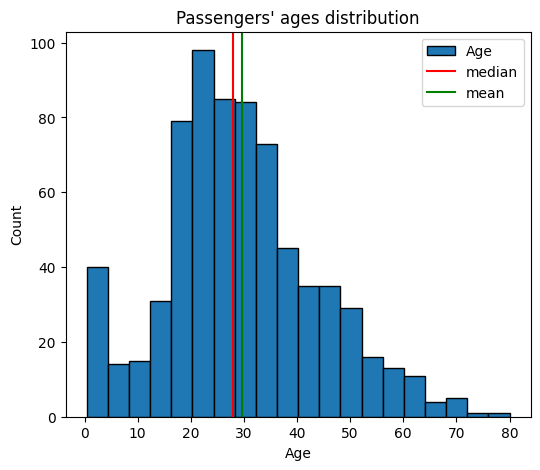

In [9]:
plt.figure(figsize=(6, 5))
titanic_file['Age'].dropna().plot(kind='hist', bins=20, edgecolor='black')
plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
median_age = np.median(titanic_file['Age'].dropna())
mean_age = np.mean(titanic_file['Age'].dropna())
plt.axvline(median_age, color='red', ls='-', label='median')
plt.axvline(mean_age, color='green', ls='-', label='mean')
plt.legend()
plt.show()

Було побудовано графік, в даному випадку гістограму, яка показує розподіл частот за віком пасажирів. За графіком видно, що найбільше всього було пасажирів віком 20-25 років. Медіана показує вік, що ділить віковий розподіл навпіл, тобто можемо вважати, що цей вік становить приблизно 27-28 років, отже ліва частина графіку це кількість людей, які молодші за цій вік, права - навпаки. Також є середнє значення віку, тобто сума вікових значень, поділена на к-сть пасажирів. Можна за гістограмою приблизно визначити, що середній вік становить близько 29 рокам.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

1. Скільки відсотків дітей від загальної кількості пасажирів врятувалося?
2. Співвідношення виживших дітей до загиблих за статтю
3. Яке співвідношення кількості пасажирів, які подорожували з дітьми, до кількості пасажирів без дітей?
4. Співвідношення кількості пасажирів за портами посадки
5. Співвідношення кількості сімей з одною дитиною до кількості сімей з двома та більше
6. Як розподілялася вартість квитків серед пасажирів різних класів?
7. Яке співвідношення кількості пасажирів за класами кают?

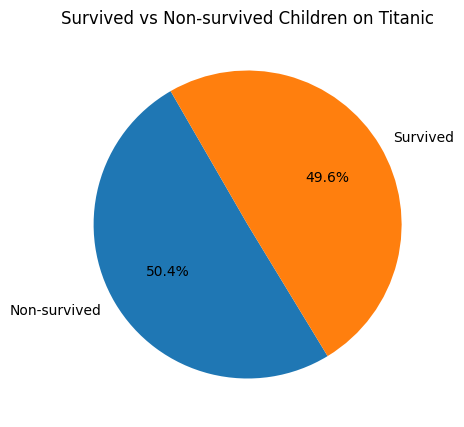

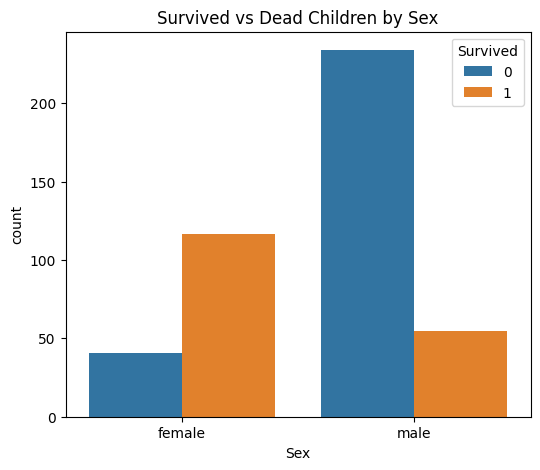

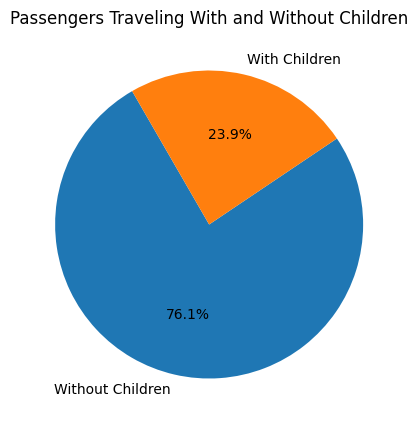

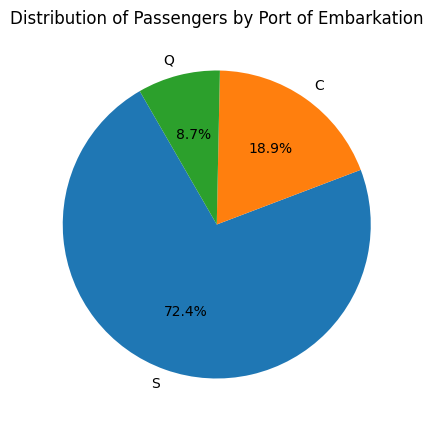

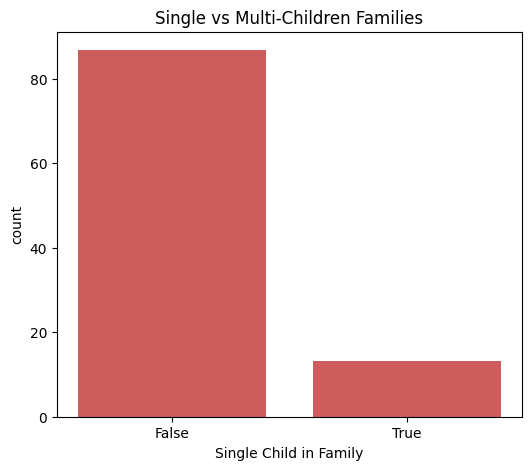

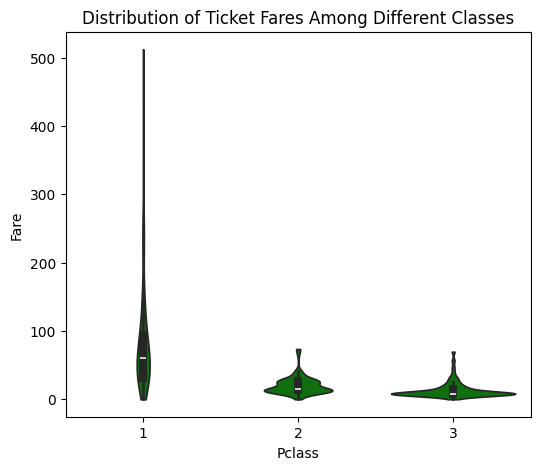

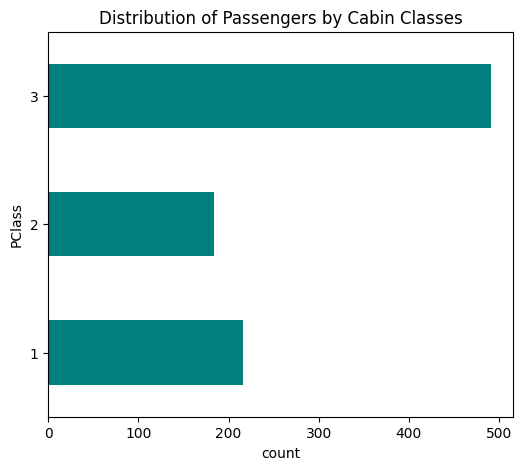

In [19]:
titanic_file['Children'] = titanic_file['Age'] <= 18
children_data = titanic_file[titanic_file['Children'] == True]
survived_children = children_data['Survived'].value_counts(normalize=True) * 100

survived_children_sex = (titanic_file.groupby(['Sex', 'Survived', 'Children'],
                                              as_index=False)
                                              ['PassengerId'].count())
survived_children_sex.rename(columns={'PassengerId': 'count'}, inplace=True)

titanic_file['WithChildren'] = titanic_file['Parch'] > 0
with_without_children = (titanic_file['WithChildren'].value_counts())

passengers_by_port = (titanic_file['Embarked'].value_counts() * 100)

titanic_file['SingleChild'] = (titanic_file['Parch'] == 1)
single_multi_children = (titanic_file['SingleChild']
                         .value_counts(normalize=True) * 100)

passengers_by_class = titanic_file['Pclass'].value_counts().sort_index()


# first chart
plt.figure(figsize=(6, 5))
plt.pie(survived_children, labels=['Non-survived', 'Survived'],
        autopct='%1.1f%%', startangle=120)
plt.title('Survived vs Non-survived Children on Titanic')
plt.show()

# second chart
plt.figure(figsize=(6, 5))
sns.barplot(x="Sex", y="count", hue="Survived",
            data=survived_children_sex, errorbar=None)
plt.title('Survived vs Dead Children by Sex')
plt.show()

# third chart
plt.figure(figsize=(6, 5))
plt.pie(with_without_children,
              labels=['Without Children', 'With Children'],
              autopct='%1.1f%%', startangle=120)
plt.title('Passengers Traveling With and Without Children')
plt.show()

# forth chart
plt.figure(figsize=(6, 5))
plt.pie(passengers_by_port, labels=passengers_by_port.index,
              autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Passengers by Port of Embarkation')
plt.show()

# fifth chart
plt.figure(figsize=(6, 5))
plt.bar(single_multi_children.index.astype(str),
              single_multi_children.values, color='indianred')
#if value is False then it's more than one child in family
plt.title('Single vs Multi-Children Families')
plt.ylabel('count')
plt.xlabel('Single Child in Family')
plt.show()

# sixth chart
plt.figure(figsize=(6, 5))
sns.violinplot(x='Pclass', y='Fare', data=titanic_file, cut=0, color='green')
plt.title('Distribution of Ticket Fares Among Different Classes')
plt.show()

# seventh chart
plt.figure(figsize=(6, 5))
passengers_by_class.plot(kind='barh', color='teal')
plt.title('Distribution of Passengers by Cabin Classes')
plt.xlabel('count')
plt.ylabel('PClass')
plt.show()

1.   Даний графік показує співвідношення виживших дітей до загиблих. За графіком видно, що різниця у відсотках невелика (0.8%), отже це означає, що майже половину дітей, які перебували на Титаніку, вдалося врятувати
2.   Даний графік показує співвідношення виживших дітей до загиблих за статтю. Як і в графіку, що показує загальне співвідношення серед пасажирів усіх вікових категорій, серед виживших переважають саме жінки, приблизно 115-120 дітей-дівчат було врятовано, менше 50 осіб загинуло. При цьому серед хлопців кількість виживших ~50-53 особи, загиблих більше 250.
3. Даний графік показує співвідношення кількості пасажирів, які подорожували з дітьми, до кількості пасажирів без дітей. Відсоток пасажирів без дітей - 76.1%, з дітьми - 23.9%, різниця в 52.2%
4. Даний графік демонструє співвідношення кількості пасажирів за портами посадки. Найбільший відсоток пасажирів (72.4%) - ті, які виконали посадку на борт в порту Саутгемптона (S), 18.9% - в порту Шербура (C) та 8.7% в Квінстауні (Q)
5. Даний графік демонструє співвідношення кількості сімей з одною дитиною до кількості сімей з двома та більше дітьми. Позначення False та True на графіку позначають наявність лише однієї дитини в сім'ї. Як видно за графіком, більшість сімей на борту мала двох та більше дітей.
6. Даний графік показує розподіл вартості квитків серед пасажирів різних класів. За графіком видно, що ціна за квитки для другого та третього класів не переважає 100 грошових одиниць (скоріше за все доларів) і більшість людей брала квитки за ціною менше 50 доларів. В той час як ціни за квитки для першого класу могли переважати за цінову позначку в 500 доларів.
7. Останній графік демонструє співвідношення кількості пасажирів за класами кают. Як можна помітити, більшість пасажирів Титаніку перебувала в каютах третього класу (майже 500 осіб), в той час як у каютах другого класу була найменша кількість людей(менше 200 осіб).





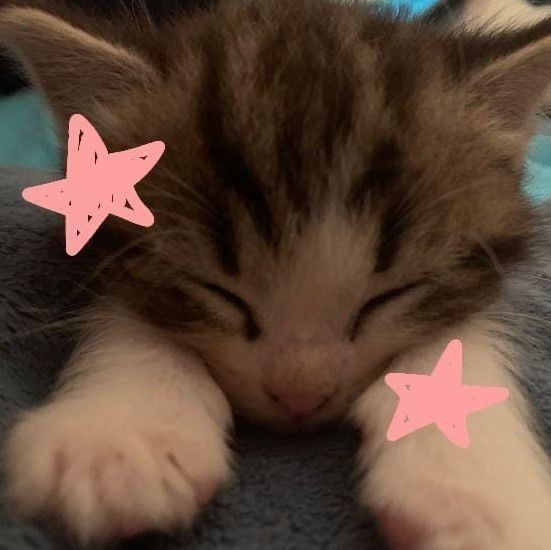